In [1]:
#importing the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing

from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))

In [2]:
df=pd.read_csv(r'abcnews-date-text.csv')

In [3]:
#visualizing
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [4]:
#publish_date attribute is of no use in our analysis, so we have to remove it
df.drop(['publish_date'],axis=1,inplace=True)

In [5]:
df.head(5)


,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [6]:
#data cleaning: Using lemmatizer and stop_words we remove words with less than 3 letters so that we are left with 
#words that will give us some context
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [7]:
df['headline_cleaned_text']=df['headline_text'].apply(clean_text)


In [8]:
df.head()


,headline_text,headline_cleaned_text
0,aba decides against community broadcasting lic...,decides community broadcasting licence
1,act fire witnesses must be aware of defamation,fire witness must aware defamation
2,a g calls for infrastructure protection summit,call infrastructure protection summit
3,air nz staff in aust strike for pay rise,staff aust strike rise
4,air nz strike to affect australian travellers,strike affect australian traveller


In [9]:
#removing unmodified headline data
df.drop(['headline_text'],axis=1,inplace=True)


In [10]:
df.head()


,headline_cleaned_text
0,decides community broadcasting licence
1,fire witness must aware defamation
2,call infrastructure protection summit
3,staff aust strike rise
4,strike affect australian traveller


In [11]:
df['headline_cleaned_text'][1]


'fire witness must aware defamation'

We will now create document term matrix. Tfidf will be used for creating document term matrix. Feture selection is also done in subsequent steps After trying various values for max_features, 1000 gave the best results

In [24]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [25]:
vect_text=vect.fit_transform(df['headline_cleaned_text'])


In [26]:
print(vect_text.shape)
print(vect_text)

(1226258, 1000)
  (0, 507)	0.7830964759517771
  (0, 180)	0.6219002406752289
  (1, 575)	0.6350011874790689
  (1, 982)	0.634252507913514
  (1, 322)	0.44101842150367176
  (2, 850)	0.6547003749683041
  (2, 681)	0.6236747415657183
  (2, 124)	0.42707989387150563
  (3, 743)	0.4535400720072263
  (3, 842)	0.4901743730039168
  (3, 56)	0.5225164976545785
  (3, 826)	0.5301009307789318
  (4, 58)	0.6373967041659779
  (4, 842)	0.7705358145591605
  (5, 977)	1.0
  (6, 709)	1.0
  (7, 542)	0.5180441448099484
  (7, 345)	0.48078322560362474
  (7, 960)	0.535924910123952
  (7, 55)	0.46180325325287314
  (8, 452)	0.42931170443114947
  (8, 202)	0.34965626131197547
  (8, 775)	0.4483609681844147
  (8, 13)	0.5219542868074372
  (8, 56)	0.4690075948807512
  :	:
  (1226249, 831)	0.3778999040452349
  (1226250, 100)	0.5663193054263862
  (1226250, 941)	0.503939080598977
  (1226250, 548)	0.4622873009035714
  (1226250, 135)	0.4600198895370982
  (1226251, 344)	0.6080525617065659
  (1226251, 969)	0.7938967704948061
  (12262

In [27]:
idf=vect.idf_


In [28]:
#By seeing idf values, we can verify that police is most common word.
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['police'])
print(dd['forecast'])


police walk
4.440524277043323
7.916979273509669


Implementing LSA

In [29]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_model=lsa.fit_transform(vect_text)

In [31]:
print(lsa_model)
print(lsa_model.shape)  

[[ 1.53029397e-04  1.01492896e-02  2.19680672e-02 ... -2.21296268e-03
   3.17245107e-03  1.32956025e-04]
 [ 7.48585858e-04  5.08976424e-02  7.87240765e-02 ...  1.18530502e-01
  -9.25239380e-02  1.51522464e-02]
 [ 5.37521234e-04  3.66229969e-02  9.96668480e-02 ...  3.24419227e-01
  -4.05173232e-02 -2.13994257e-02]
 ...
 [ 7.30007417e-04  3.32113316e-02  6.16869649e-02 ...  6.26249380e-04
   6.26462090e-02  4.76153017e-03]
 [ 2.30190071e-04  1.17542405e-02  2.81349680e-02 ...  2.49101219e-03
   1.41661310e-02  1.56714585e-03]
 [ 9.47397042e-04  7.22237294e-02  7.51528438e-02 ... -1.76142492e-03
   2.51522741e-01 -1.62705114e-01]]
(1226258, 10)


In [32]:
#visualizing document
l=lsa_model[1]
print("Document 1 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  

Document 1 :
Topic  0  :  0.0748585858184459
Topic  1  :  5.089764238612444
Topic  2  :  7.8724076537455
Topic  3  :  -8.159067082369477
Topic  4  :  -4.87095528067059
Topic  5  :  8.037925392092514
Topic  6  :  36.81827477540679
Topic  7  :  11.853050228954682
Topic  8  :  -9.252393804780281
Topic  9  :  1.515224636905559


In [33]:
print(lsa.components_.shape) 
print(lsa.components_)


(10, 1000)
[[ 2.03281184e-05  2.64787770e-05  6.20929444e-05 ...  1.18657082e-04
   3.62308183e-05  5.08781314e-05]
 [ 7.72145718e-04  1.03745118e-03  1.27680570e-03 ...  2.53162975e-03
   2.28252111e-03  2.60672083e-03]
 [ 2.24774636e-03  3.28756215e-03  4.04880539e-03 ...  7.76397434e-03
   4.56811224e-03  5.07171809e-03]
 ...
 [ 5.87570157e-05  7.32074353e-05 -1.00938109e-04 ... -6.23350554e-04
   1.44086625e-03 -1.24604982e-04]
 [ 1.68403535e-03  2.81952147e-03  2.82322591e-03 ...  1.88151558e-03
   2.13497079e-04  5.49873811e-04]
 [ 2.07487757e-04  2.85705331e-04  2.98782954e-04 ...  1.14650194e-04
   8.79810202e-04  1.87604603e-04]]


In [34]:
# Now we will extract most occuring/important words of each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
interview extended michael john david smith james police andrew mark 

Topic 1: 
police death woman fire crash court say probe call murder 

Topic 2: 
say australia plan council call back govt fire court water 

Topic 3: 
say police need trump minister must expert wont needed hunt 

Topic 4: 
australia south world police first test china coronavirus india cricket 

Topic 5: 
court face woman murder fire charged charge accused death crash 

Topic 6: 
fire house sydney home crew govt australia plan school damage 

Topic 7: 
call fire say medium home house death australian inquiry spark 

Topic 8: 
australian woman crash back dy year open killed charged world 

Topic 9: 
back court police fire australian fight world hit face school 



C:\Users\satta\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


LDA implementation

In [41]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [42]:
lda_model=lda.fit_transform(vect_text)

In [43]:
print(lda_model.shape) 
print(lda_model)

(1226258, 10)
[[0.0415801  0.0415801  0.0415801  ... 0.0415801  0.0415801  0.0415801 ]
 [0.1996064  0.03690801 0.03689666 ... 0.03689666 0.03689666 0.03689666]
 [0.03696236 0.03696236 0.03696236 ... 0.03696236 0.03696236 0.27895505]
 ...
 [0.03344559 0.3957639  0.03344559 ... 0.17917452 0.03344559 0.03344559]
 [0.18880274 0.03341149 0.03341149 ... 0.03341149 0.37557157 0.03341149]
 [0.04149469 0.04149469 0.04149469 ... 0.04149469 0.04149469 0.04149469]]


In [44]:
sum=0
for i in lda_model[0]:
  sum=sum+i
print(sum) 

0.9999999999999999


In [45]:
print("Document 0: ")
for i,topic in enumerate(lda_model[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  4.158009834668618 %
Topic  1 :  4.158009834677284 %
Topic  2 :  4.158009834668093 %
Topic  3 :  4.158009834683156 %
Topic  4 :  4.158009834671292 %
Topic  5 :  62.5779114879302 %
Topic  6 :  4.158009834666711 %
Topic  7 :  4.158009834682379 %
Topic  8 :  4.158009834673401 %
Topic  9 :  4.158009834678857 %


In [46]:
print(lda.components_)
print(lda.components_.shape) 

[[1.00002786e-01 1.00000672e-01 1.00001010e-01 ... 1.00010646e-01
  1.00005637e-01 1.00006840e-01]
 [1.00002066e-01 1.00001905e-01 1.00000813e-01 ... 1.00007055e-01
  1.00002525e-01 1.00003027e-01]
 [1.00001884e-01 1.00000534e-01 1.00000894e-01 ... 1.00004327e-01
  1.00003207e-01 1.00005296e-01]
 ...
 [1.00006834e-01 1.00001776e-01 1.00001692e-01 ... 1.00005566e-01
  1.00002638e-01 1.00004756e-01]
 [1.00001821e-01 1.00001198e-01 6.38477287e+02 ... 2.75752805e+03
  2.56337014e+02 1.00006631e-01]
 [1.00001312e-01 1.00000487e-01 1.00000501e-01 ... 1.00005458e-01
  1.00006058e-01 1.00007260e-01]]
(10, 1000)


In [48]:
# Now we will extract most occuring/important words of each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
australian trump news fire health attack open business brisbane island 

Topic 1: 
police victoria sydney melbourne restriction finance rise water council hotel 

Topic 2: 
queensland case donald adelaide change victorian trial perth federal protest 

Topic 3: 
election family canberra crash record andrew royal president win commission 

Topic 4: 
say woman government coronavirus china school could live time drum 

Topic 5: 
morrison take community accused regional climate claim shooting john city 

Topic 6: 
coronavirus covid court death call child tasmania murder national hospital 

Topic 7: 
year border charged back north report million care west budget 

Topic 8: 
australia world market life people bushfire dy show final country 

Topic 9: 
home south first state coast found worker scott former tasmanian 



For sake of visualization we can draw a plot of important words of each topic

In [52]:
from wordcloud import WordCloud
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

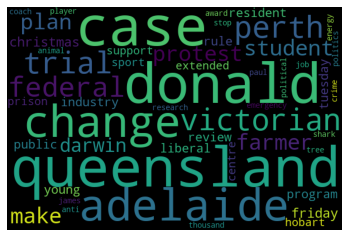

In [55]:

draw_word_cloud(2)

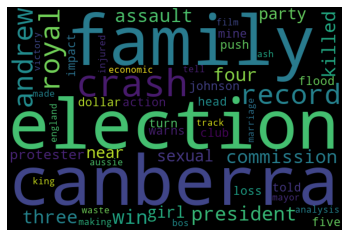

In [56]:
draw_word_cloud(3)  